# COVID-19 Data Analysis (Assignment 5)

**Submitted By : Om Nimmalwar**


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
plt.rcParams['figure.figsize'] = (12,6)
sns.set(style='whitegrid')

print('libraries loaded')

libraries loaded


In [6]:
# Paths to uploaded files
CONFIRMED_FILE = "C:\Covid_19_Data_Analysis\All_DataSets\covid19_Confirmed_dataset.csv"
DEATHS_FILE = "C:\Covid_19_Data_Analysis\All_DataSets\covid19_deaths_dataset.csv"

# Read CSVs
conf = pd.read_csv(CONFIRMED_FILE)
dead = pd.read_csv(DEATHS_FILE)

conf.head()


<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\HP\AppData\Local\Temp\ipykernel_10200\3024738252.py:2: SyntaxWarning: invalid escape sequence '\C'
  CONFIRMED_FILE = "C:\Covid_19_Data_Analysis\All_DataSets\covid19_Confirmed_dataset.csv"
C:\Users\HP\AppData\Local\Temp\ipykernel_10200\3024738252.py:3: SyntaxWarning: invalid escape sequence '\C'
  DEATHS_FILE = "C:\Covid_19_Data_Analysis\All_DataSets\covid19_deaths_dataset.csv"


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


In [7]:
# Inspect columns
def show_info(df, name):
    print(f"--- {name} ---")
    print(df.columns.tolist()[:10], '... total', len(df.columns))
    display(df.head())

show_info(conf, 'Confirmed')
show_info(dead, 'Deaths')


--- Confirmed ---
['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20'] ... total 104


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27


--- Deaths ---
['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20'] ... total 104


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3,6,8,12,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [8]:
# Convert wide date columns to long format

def wide_to_long(df, value_name='cases'):
    id_vars = ['Province/State','Country/Region','Lat','Long'] if all(c in df.columns for c in ['Province/State','Country/Region','Lat','Long']) else [c for c in df.columns if c.lower() in ['province/state','country/region','lat','long']]
    date_cols = [c for c in df.columns if c not in id_vars]
    long = df.melt(id_vars=id_vars, value_vars=date_cols, var_name='Date', value_name=value_name)
    # parse dates (format like M/D/YY or M/D/YYYY)
    def parse_date(x):
        try:
            return pd.to_datetime(x)
        except:
            try:
                return pd.to_datetime(x, format='%m/%d/%y')
            except:
                return pd.to_datetime(x, errors='coerce')
    long['Date'] = long['Date'].apply(parse_date)
    return long

conf_long = wide_to_long(conf, value_name='Confirmed')
dead_long = wide_to_long(dead, value_name='Deaths')

print('confirmed long:', conf_long.shape)
print('deaths long:', dead_long.shape)
conf_long.head()


confirmed long: (26600, 6)
deaths long: (26600, 6)


,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0


In [9]:
# Aggregate at country-date level

conf_country = conf_long.groupby(['Country/Region','Date'], as_index=False)['Confirmed'].sum()
dead_country = dead_long.groupby(['Country/Region','Date'], as_index=False)['Deaths'].sum()

conf_country = conf_country.rename(columns={'Country/Region':'Country'})
dead_country = dead_country.rename(columns={'Country/Region':'Country'})

print(conf_country.shape, dead_country.shape)
conf_country.head()


(18700, 3) (18700, 3)


,Country,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0


In [10]:
# Latest totals per country (last available date)
last_date = conf_country['Date'].max()
print('Last date in confirmed data:', last_date)

latest_conf = conf_country[conf_country['Date']==last_date].sort_values('Confirmed', ascending=False)
latest_dead = dead_country[dead_country['Date']==dead_country['Date'].max()].sort_values('Deaths', ascending=False)

print('Top 10 confirmed countries:')
display(latest_conf[['Country','Confirmed']].head(10))

print('Top 10 death countries:')
display(latest_dead[['Country','Deaths']].head(10))


Last date in confirmed data: 2020-04-30 00:00:00
Top 10 confirmed countries:


,Country,Confirmed
17399,US,1069424
15799,Spain,213435
8599,Italy,205463
17799,United Kingdom,172481
6299,France,167299
6699,Germany,163009
17299,Turkey,120204
13999,Russia,106498
8199,Iran,94640
2399,Brazil,87187


Top 10 death countries:


,Country,Deaths
17399,US,62996
8599,Italy,27967
17799,United Kingdom,26842
15799,Spain,24543
6299,France,24410
1699,Belgium,7594
6699,Germany,6623
8199,Iran,6028
2399,Brazil,6006
12199,Netherlands,4811


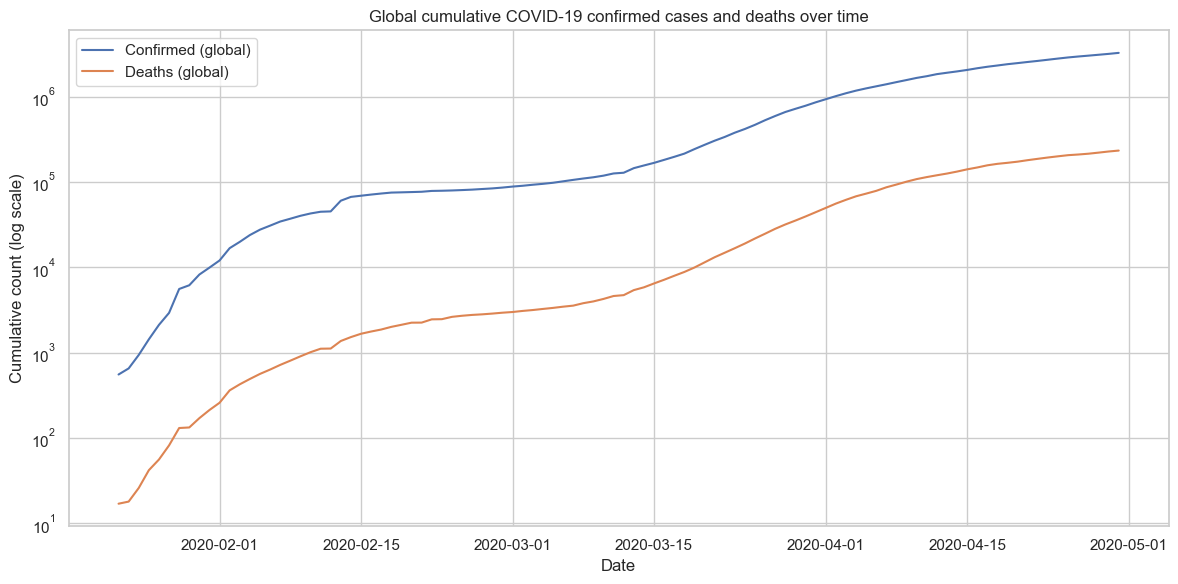

In [11]:
# Global trend: sum over time

global_conf = conf_country.groupby('Date', as_index=False)['Confirmed'].sum()
global_dead = dead_country.groupby('Date', as_index=False)['Deaths'].sum()

plt.figure(figsize=(12,6))
plt.plot(global_conf['Date'], global_conf['Confirmed'], label='Confirmed (global)')
plt.plot(global_dead['Date'], global_dead['Deaths'], label='Deaths (global)')
plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Cumulative count (log scale)')
plt.title('Global cumulative COVID-19 confirmed cases and deaths over time')
plt.legend()
plt.tight_layout()
plt.show()


Top5 countries: ['US', 'Spain', 'Italy', 'United Kingdom', 'France']


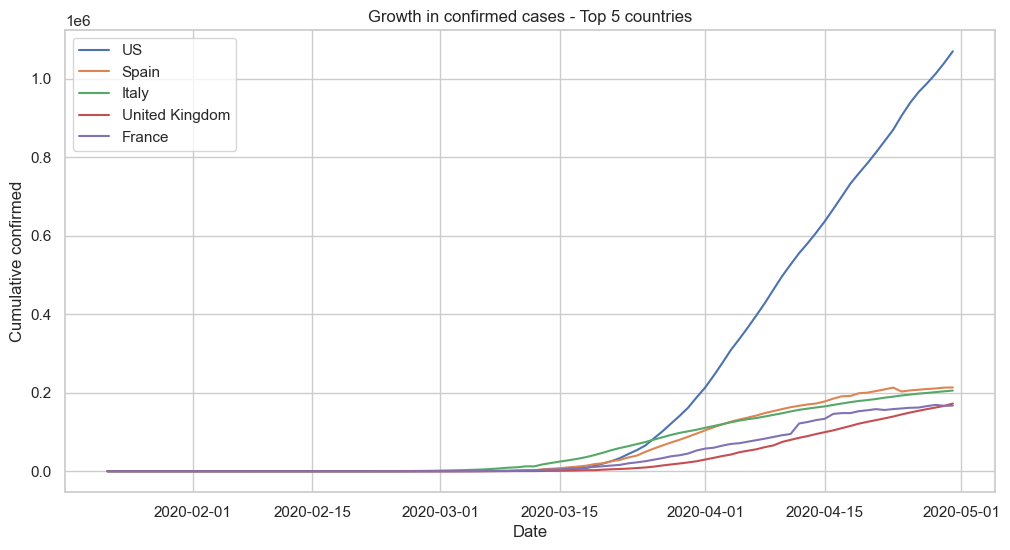

In [12]:
# Country growth example for top 5 confirmed countries

top5 = latest_conf['Country'].head(5).tolist()
print('Top5 countries:', top5)

plt.figure(figsize=(12,6))
for c in top5:
    s = conf_country[conf_country['Country']==c].set_index('Date').sort_index()['Confirmed']
    plt.plot(s.index, s.values, label=c)
plt.xlabel('Date')
plt.ylabel('Cumulative confirmed')
plt.title('Growth in confirmed cases - Top 5 countries')
plt.legend()
plt.show()


In [13]:
# Merge confirmed + deaths and compute CFR (Case Fatality Rate)

merge_cd = pd.merge(conf_country, dead_country, on=['Country','Date'], how='left')
merge_cd['Deaths'] = merge_cd['Deaths'].fillna(0)
merge_cd['CFR'] = (merge_cd['Deaths'] / merge_cd['Confirmed']).replace([np.inf, -np.inf], np.nan)

# Latest CFR per country
latest_merge = merge_cd[merge_cd['Date']==merge_cd['Date'].max()].copy()
latest_merge = latest_merge.sort_values('Confirmed', ascending=False)
latest_merge['CFR_percent'] = latest_merge['CFR']*100

print('Top 10 by confirmed with CFR:')
display(latest_merge[['Country','Confirmed','Deaths','CFR_percent']].head(10))


Top 10 by confirmed with CFR:


,Country,Confirmed,Deaths,CFR_percent
17399,US,1069424,62996,5.890648
15799,Spain,213435,24543,11.499051
8599,Italy,205463,27967,13.611697
17799,United Kingdom,172481,26842,15.562294
6299,France,167299,24410,14.590643
6699,Germany,163009,6623,4.062966
17299,Turkey,120204,3174,2.640511
13999,Russia,106498,1073,1.007531
8199,Iran,94640,6028,6.369400
2399,Brazil,87187,6006,6.888642


In [14]:
# Save summary CSVs for assignment submission
OUTPUT_DIR = '/mnt/data/covid_analysis_outputs'
import os
os.makedirs(OUTPUT_DIR, exist_ok=True)

latest_conf.to_csv(os.path.join(OUTPUT_DIR,'latest_confirmed_by_country.csv'), index=False)
latest_dead.to_csv(os.path.join(OUTPUT_DIR,'latest_deaths_by_country.csv'), index=False)
latest_merge.to_csv(os.path.join(OUTPUT_DIR,'latest_confirmed_deaths_cfr.csv'), index=False)

print('Saved summary files to', OUTPUT_DIR)


Saved summary files to /mnt/data/covid_analysis_outputs
